In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\manik\AppData\Local\Temp\ipykernel_21896\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
car=pd.read_csv('./quikr_car.csv')

In [3]:
backup=car.copy()

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [6]:
car.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [7]:
# drop year object non integer values
# drop fuel object null value
# drop ksm_driven object null values
# drop price object 'ask for price' and convert into int
# perform one hot encoder on name,company,fuel_type col

In [8]:
car=car[car.year.str.isnumeric()]
car.year=car.year.astype(int)

In [9]:
car=car[~(car.Price=='Ask For Price')]
car.Price=car.Price.str.replace(',','').astype(int)

In [10]:
car.kms_driven=car.kms_driven.str.split(' ').str.slice(0,1).apply(lambda x: x[0].replace(',',''))
car=car[car.kms_driven.str.isnumeric()]
car.kms_driven=car.kms_driven.astype(int)

In [11]:
car.name=car.name.str.split(' ').str[0:3].str.join(" ")

In [12]:
car=car.dropna()

In [13]:
car=car[car['Price']<6000000]

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int32 
 3   Price       815 non-null    int32 
 4   kms_driven  815 non-null    int32 
 5   fuel_type   815 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.0+ KB


In [15]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [20]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f6/28/b569523552a11b49dc4d33952f43dedb23792fe8ce2f2151d070d615861a/scikit_learn-1.4.0-1-cp312-cp312-win_amd64.whl.metadata
  Using cached scikit_learn-1.4.0-1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/f3/31/91a2a3c5eb85d2bfa86d7c98f2df5d77dcdefb3d80ca9f9037ad04393acf/scipy-1.12.0-cp312-cp312-win_amd64.whl.metadata
  Using cached scipy-1.12.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? e


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------- ----------------- 6.1/10.6 MB 47.0 kB/s eta 0:01:36
   ---------------------- ----------------- 6.1/10.6 MB 47.0 kB/s eta 0:01:36
   ---------------------- ----------------- 6.1/10.6 MB 47.0 kB/s eta 0:01:36
   ---------------------- ----------------- 6.1/10.6 MB 47.0 kB/s eta 0:01:36
   ---------------------- ----------------- 6.1/10.6 MB 47.0 kB/s eta 0:01:36
   ---------------------- ----------------- 6.1/10.6 MB 47.0 kB/s eta 0:01:36
   ---------------------- ----------------- 6.1/10.6 MB 47.0 kB/s eta 0:01:36
   ----------------------- ---------------- 6.1/10.6 MB 47.2 kB/s eta 0:01:36
   ----------------------- ---------------- 6.1/10.6 MB 47.2 kB/s eta 0:01:36
   ----------------------- ---------------- 6.1/10.6 MB 47.2 kB/s eta 0:01:36
   ----------------------- ---------------- 6.1/10.6 MB 47.2 kB/s eta 0:01:36
   ----------------------- ---------------- 6.1/10.6 MB 47.2 kB/s eta 0:01:36
   ----------------------- ---------------- 6.1/10.6 MB 47.2 kB

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

In [22]:
x=car.drop(columns={"Price"})
y=car.Price

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
ohe=OneHotEncoder(drop='first')
ohe.fit(car[['name','company','fuel_type']])
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                     remainder='passthrough')
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(xtrain,ytrain)
y_pred=pipe.predict(xtest)
r2_score(ytest,y_pred)

0.648410356051369

In [25]:
pipe.predict(pd.DataFrame(columns=xtest.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([410927.49417301])

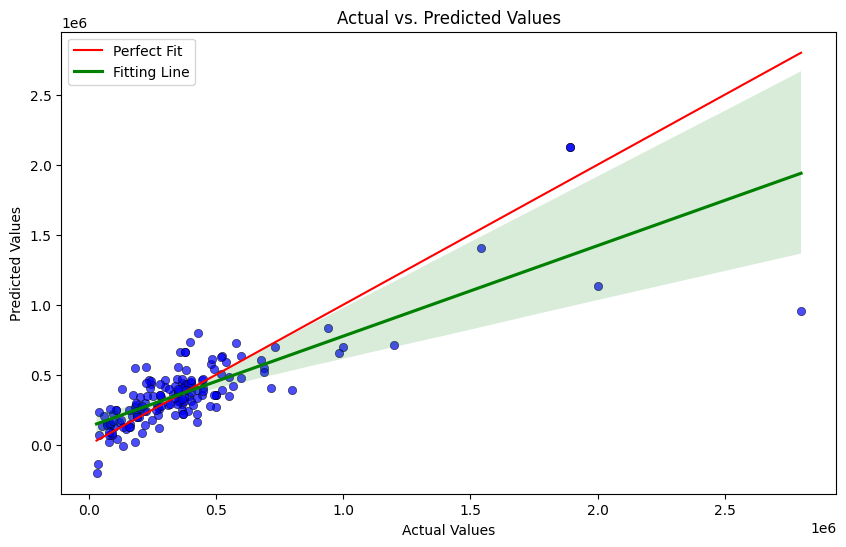

In [26]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values
sns.scatterplot(x=ytest, y=y_pred, alpha=0.7, color='blue', edgecolor='k')

# Fitting line
sns.lineplot(x=ytest, y=ytest, color='red', label='Perfect Fit')  # Perfect fit line
sns.regplot(x=ytest, y=y_pred, scatter=False, color='green', label='Fitting Line')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [27]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [28]:
np.argmax(scores)

302

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=np.argmax(scores))
ohe=OneHotEncoder(drop='first')
ohe.fit(car[['name','company','fuel_type']])
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                     remainder='passthrough')
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(xtrain,ytrain)
y_pred=pipe.predict(xtest)
r2_score(ytest,y_pred)

0.7634552773684578

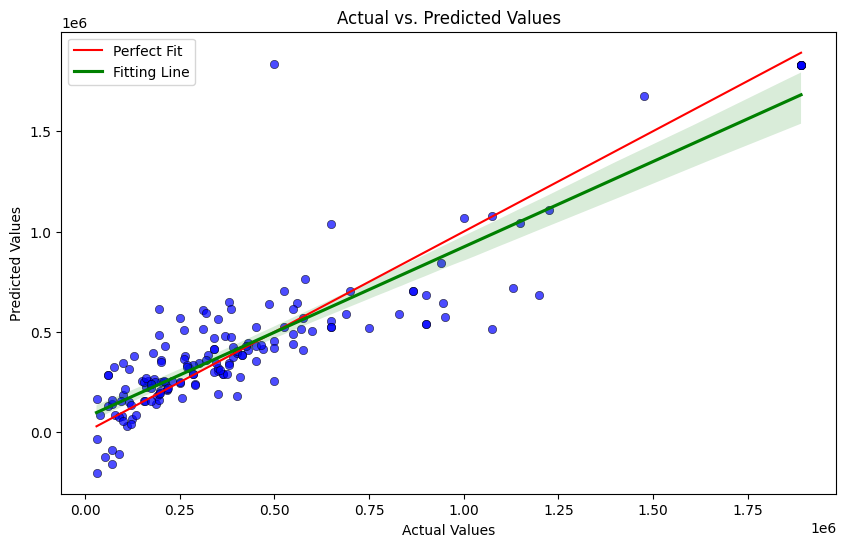

In [31]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values
sns.scatterplot(x=ytest, y=y_pred, alpha=0.7, color='blue', edgecolor='k')

# Fitting line
sns.lineplot(x=ytest, y=ytest, color='red', label='Perfect Fit')  # Perfect fit line
sns.regplot(x=ytest, y=y_pred, scatter=False, color='green', label='Fitting Line')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [32]:
import pickle
# pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [33]:
pipe.predict(pd.DataFrame(columns=xtest.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,2137,'Petrol']).reshape(1,5)))

array([464987.55988652])

In [34]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

In [35]:
car.to_csv('cleaned_cars')

In [36]:
pickle.dump(car,open('cars_pkl.pkl','wb'))

In [37]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [38]:
xtest.columns

Index(['name', 'company', 'year', 'kms_driven', 'fuel_type'], dtype='object')

In [39]:
car.columns.drop('Price')

Index(['name', 'company', 'year', 'kms_driven', 'fuel_type'], dtype='object')